In [1]:
import os,glob,imp,sys
sys.path.append(os.path.expanduser('~/smodels-utils'))
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.interpolate import interp1d
from smodels_utils.dataPreparation.PDFLimitReader import PDFLimitReader
from matplotlib import colors
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [2]:
data =  {
        'name': 'CMS-EXO-19-001_Figure_003',
        'x':{'limits': (2.5, 5.0)},
        'y':{'limits': (1000, 3000)},
        'z':{'limits': (5e-3, 1), 'log':True},
        }

r = PDFLimitReader( data )

In [12]:
pts = []
for y in np.arange(1000,3000,10.0):
    for x in np.arange(2.5,5.0,0.033):
        eff = r.get_limit(x,y)
        pts.append([x,y,eff])
        
pts = np.array(pts)

/home/lessa/.local/lib/python3.8/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


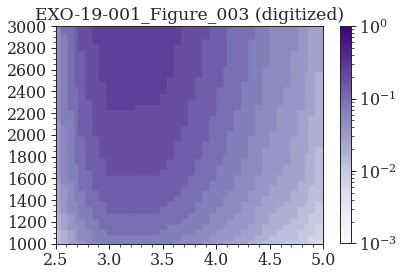

In [13]:
plt.scatter(pts[:,0],pts[:,1],c=pts[:,2],vmin=1e-3,vmax=1.0,
            norm=colors.LogNorm(),cmap='Purples')
ax = plt.gca()
plt.colorbar()
plt.savefig('Digitized.pdf')
plt.xticks(np.arange(2.5,5.5,0.5))
plt.yticks(np.arange(1000,3200,200))
ax.set_xticks(np.arange(2.5,5.5,0.1),minor=True)
ax.set_yticks(np.arange(1000,3000,50),minor=True)
plt.ylim(1000,3000)
plt.xlim(2.5,5)
plt.title('EXO-19-001_Figure_003 (digitized)')
# plt.savefig('Digitized.pdf')
# plt.savefig('Digitized.png')
plt.show()

In [14]:
# #Use fewer points to store data and convert log10(lifetime/mm)  to width (GeV):
# data = []
# for y in np.arange(1000,3000,100.0):
#     for x in np.arange(2.5,5.0,0.033):
#         eff = r.get_limit(x,y)
#         if eff is None or np.isnan(eff):
#             continue        
#         mass = y
#         width = 1.967e-13/(10**x)
#         data.append([mass,width,eff])
        


#Trim data along mass and convert log10(lifetime/mm)  to width (GeV):
data = []
eff_old = None
for pt in sorted(pts.tolist()):
    width = 1.967e-13/(10**pt[0])
    mass = pt[1]
    eff = pt[2]    
    if eff is None or np.isnan(eff):
        continue
    if eff_old is None or eff != eff_old:
        data.append([mass,width,eff])
        eff_old = eff
        
data = np.array(data,dtype='float')
print(data.shape)

(401, 3)


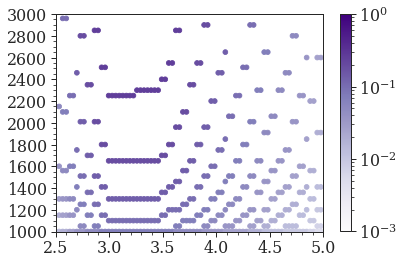

In [15]:
plt.scatter(np.log10(1.967e-13/data[:,1]),data[:,0],c=data[:,2],vmin=1e-3,vmax=1.0,
            norm=colors.LogNorm(),cmap='Purples')
ax = plt.gca()
plt.colorbar()
plt.xticks(np.arange(2.5,5.5,0.5))
plt.yticks(np.arange(1000,3200,200))
ax.set_xticks(np.arange(2.5,5.5,0.1),minor=True)
ax.set_yticks(np.arange(1000,3000,50),minor=True)
plt.ylim(1000,3000)
plt.xlim(2.5,5)
# plt.title('EXO-19-001_Figure_003 (digitized)')
# plt.savefig('Digitized.pdf')
# plt.savefig('Digitized.png')
plt.show()

In [16]:
names = ('mass (GeV)','width (GeV)', 'eff')
header = '%19s'*len(names) %names
header = '#'+header[3:]
np.savetxt('CMS-EXO-19-001_Figure_003.txt',data,
           header=header,fmt = ('     %1.7e')*3,
          comments='#Data digitized from\n#http://cms-results.web.cern.ch/cms-results/public-results/publications/EXO-19-001/CMS-EXO-19-001_Figure_003.pdf\n#using PDFLimitReader\n')
